# **SyriaTel Customer Churn**


### Business Problem
SyriaTel, a leading telecommunications provider, faces a critical challenge in mitigating customer churn within its subscriber base. The company seeks to address the increasing attrition rates observed among its clientele. Identifying the underlying factors driving customer defection and implementing proactive strategies to retain valuable subscribers are imperative to sustain profitability and competitiveness in the telecommunications industry. Therefore, there is a pressing need to develop robust predictive models and actionable insights to effectively manage and reduce customer churn rates, thereby optimizing customer retention efforts and enhancing overall business performance.



## 1. Business Understanding
The SyriaTel Customer Churn project aims to address a significant real-world problem faced by telecommunications companies worldwide: customer churn. Churn, or the rate at which customers discontinue their services with a company, poses a substantial challenge to the profitability and sustainability of telecom providers. In the case of SyriaTel, the escalating churn rates within its subscriber base underscore the urgency of implementing effective strategies to mitigate attrition and enhance customer retention.

Stakeholders involved in this project include SyriaTel itself, as well as its customers. For SyriaTel, reducing churn rates directly impacts its bottom line, as it ensures the retention of valuable subscribers and sustains long-term revenue streams. Additionally, satisfied customers are more likely to advocate for the company and contribute to its positive brand image.

Customers, on the other hand, benefit from improved services and reduced churn through enhanced customer experiences and uninterrupted connectivity. By leveraging insights gained from this project, SyriaTel can proactively address customer needs, anticipate potential churn indicators, and implement targeted retention initiatives.

In conclusion, the SyriaTel Customer Churn project holds significant implications for both the company and its customers. By accurately identifying churn predictors and implementing proactive retention strategies, SyriaTel can effectively mitigate customer churn, optimize customer satisfaction, and maintain its competitive edge in the telecommunications industry.


## 2. Data Understanding
The dataset for the SyriaTel Customer Churn project comprises several features that provide valuable insights into customer behavior and engagement with SyriaTel's telecommunications services. These features include:

* **State:** The state in which the customer resides.
* **Account_Length:** The length of time the customer has been an active subscriber.
* **Area_Code:** The area code associated with the customer's phone number.
* **Phone_Number:** The unique identifier for each customer's phone number.
* **International_Plan:** A binary indicator of whether the customer has an international calling plan.
* **Voice_Mail_Plan:** A binary indicator of whether the customer has a voicemail plan.
* **Number_Vmail_Messages:** The number of voicemail messages received by the customer.
* **Total_Day_Minutes:** The total number of minutes the customer used during daytime hours.
* **Total_Day_Calls:** The total number of calls made by the customer during daytime hours.
* **Total_Day_Charge:** The total charges incurred by the customer for daytime usage.
* **Total_Eve_Minutes:** The total number of minutes the customer used during evening hours.
* **Total_Eve_Calls:** The total number of calls made by the customer during evening hours.
* **Total_Eve_Charge:** The total charges incurred by the customer for evening usage.
* **Total_Night_Minutes:** The total number of minutes the customer used during nighttime hours.
* **Total_Night_Calls:** The total number of calls made by the customer during nighttime hours.
* **Total_Night_Charge:** The total charges incurred by the customer for nighttime usage.
* **Total_Intl_Minutes:** The total number of international minutes used by the customer.
* **Total_Intl_Calls:** The total number of international calls made by the customer.
* **Total_Intl_Charge:** The total charges incurred by the customer for international usage.
* **Customer_Service_Calls:** The number of customer service calls made by the customer.
* **Churn:** The target variable indicating whether the customer churned (discontinued service) or not.

These features provide a comprehensive view of various aspects of customer interaction with SyriaTel's services, including usage patterns, plan subscriptions, and customer service engagement. Analyzing these features will facilitate the identification of key drivers of churn and the development of predictive models to mitigate customer attrition.


## 3. Data Preparation

###  Import Necessary Modules

In [954]:
import pandas as pd
import numpy as np
import scipy as stats
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier


# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

###  a) Loading the Dataset

In [955]:
#loading the csv file
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [956]:
# Display the first few rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [957]:
# Display the last few rows
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


From the above information, it's evident that the column names need to be changed for clarity and consistency. By converting them to title case and replacing spaces with underscores, the column names become more readable and easier to work with programmatically. This standardization improves the overall organization and understanding of the dataset, facilitating efficient analysis and manipulation tasks. 

In [958]:
# Convert the column names to title case and replace spaces with underscores
df.columns = df.columns.str.title().str.replace(' ', '_')

# Display the modified column names
df.columns

Index(['State', 'Account_Length', 'Area_Code', 'Phone_Number',
       'International_Plan', 'Voice_Mail_Plan', 'Number_Vmail_Messages',
       'Total_Day_Minutes', 'Total_Day_Calls', 'Total_Day_Charge',
       'Total_Eve_Minutes', 'Total_Eve_Calls', 'Total_Eve_Charge',
       'Total_Night_Minutes', 'Total_Night_Calls', 'Total_Night_Charge',
       'Total_Intl_Minutes', 'Total_Intl_Calls', 'Total_Intl_Charge',
       'Customer_Service_Calls', 'Churn'],
      dtype='object')

In [959]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account_Length          3333 non-null   int64  
 2   Area_Code               3333 non-null   int64  
 3   Phone_Number            3333 non-null   object 
 4   International_Plan      3333 non-null   object 
 5   Voice_Mail_Plan         3333 non-null   object 
 6   Number_Vmail_Messages   3333 non-null   int64  
 7   Total_Day_Minutes       3333 non-null   float64
 8   Total_Day_Calls         3333 non-null   int64  
 9   Total_Day_Charge        3333 non-null   float64
 10  Total_Eve_Minutes       3333 non-null   float64
 11  Total_Eve_Calls         3333 non-null   int64  
 12  Total_Eve_Charge        3333 non-null   float64
 13  Total_Night_Minutes     3333 non-null   float64
 14  Total_Night_Calls       3333 non-null   

In [960]:
# Display DataFrame dimensions (rows, columns)
df.shape

(3333, 21)

In [961]:
# Display descriptive statistics for DataFrame columns (transposed)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Account_Length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area_Code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number_Vmail_Messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total_Day_Minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total_Day_Calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total_Day_Charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total_Eve_Minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total_Eve_Calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total_Eve_Charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total_Night_Minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [962]:
# Display the data types of each column in the DataFrame
df.dtypes

State                      object
Account_Length              int64
Area_Code                   int64
Phone_Number               object
International_Plan         object
Voice_Mail_Plan            object
Number_Vmail_Messages       int64
Total_Day_Minutes         float64
Total_Day_Calls             int64
Total_Day_Charge          float64
Total_Eve_Minutes         float64
Total_Eve_Calls             int64
Total_Eve_Charge          float64
Total_Night_Minutes       float64
Total_Night_Calls           int64
Total_Night_Charge        float64
Total_Intl_Minutes        float64
Total_Intl_Calls            int64
Total_Intl_Charge         float64
Customer_Service_Calls      int64
Churn                        bool
dtype: object

In [963]:
# Print Numerical columns
print(f"Numerical Columns: {df.select_dtypes(include='number').columns}\n")

# Print Categorical Columns
print(f"Categorical Columns: {df.select_dtypes(include='object').columns}")

Numerical Columns: Index(['Account_Length', 'Area_Code', 'Number_Vmail_Messages',
       'Total_Day_Minutes', 'Total_Day_Calls', 'Total_Day_Charge',
       'Total_Eve_Minutes', 'Total_Eve_Calls', 'Total_Eve_Charge',
       'Total_Night_Minutes', 'Total_Night_Calls', 'Total_Night_Charge',
       'Total_Intl_Minutes', 'Total_Intl_Calls', 'Total_Intl_Charge',
       'Customer_Service_Calls'],
      dtype='object')

Categorical Columns: Index(['State', 'Phone_Number', 'International_Plan', 'Voice_Mail_Plan'], dtype='object')


### b) Data Cleaning

In [964]:
# Count missing values in each column

df.isna().sum()

State                     0
Account_Length            0
Area_Code                 0
Phone_Number              0
International_Plan        0
Voice_Mail_Plan           0
Number_Vmail_Messages     0
Total_Day_Minutes         0
Total_Day_Calls           0
Total_Day_Charge          0
Total_Eve_Minutes         0
Total_Eve_Calls           0
Total_Eve_Charge          0
Total_Night_Minutes       0
Total_Night_Calls         0
Total_Night_Charge        0
Total_Intl_Minutes        0
Total_Intl_Calls          0
Total_Intl_Charge         0
Customer_Service_Calls    0
Churn                     0
dtype: int64

In [965]:
# Count duplicated rows in the DataFrame
df.duplicated().sum()

0

Checks if there are any duplicate phone numbers in the 'Phone_Number' column.

In [966]:
# Check for duplicates in the 'Phone_Number' column

df['Phone_Number'].duplicated().sum()

0

No duplicates found: There are no phone numbers that appear more than once in the "Phone_Number" column of your DataFrame df. So, I'll be setting the 'Phone_Number' column as the index since its a unique identifier.

In [900]:
# Set the 'Phone_Number' column as the index of the DataFrame

df.set_index('Phone_Number', inplace=True)

In [901]:
# Display the first few rows of the DataFrame after setting 'Phone_Number' as index

df.head()

,State,Account_Length,Area_Code,International_Plan,Voice_Mail_Plan,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Day_Charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,Customer_Service_Calls,Churn
Phone_Number,,,,,,,,,,,,,,,,,,,,
382-4657,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
371-7191,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
358-1921,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
375-9999,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
330-6626,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


The code below iterates through each column in a DataFrame and prints the value counts for each column.
It helps you understand the distribution of values within each column, identifying the most frequent and least frequent values.

In [904]:
for column in df.columns:
    # Get the value counts for the current column
    value_counts = df[column].value_counts()
    
    # Print the column name and its value counts
    print(f"Value counts for column '{column}':\n{value_counts}\n")

Value counts for column 'State':
State
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64

Value counts for column 'Account_Length':
Account_Length
105    43
87     42
101    40
93     40
90     39
       ..
243     1
200     1
232     1
5       1
221     1
Name: count, Length: 212, dtype: int64

Value counts for column 'Area_Code':
Area_Code
415    1655
510     840
408     838
Name: count, dtype: int64

Value counts for column 'International_Plan':
International_Plan
no     3010
yes     323
Name: count, dtype

### c) Exploratory Data Analysis

### Distribution of the Features
##### Churn Distribution Visualization

In [905]:
df['Churn'].value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

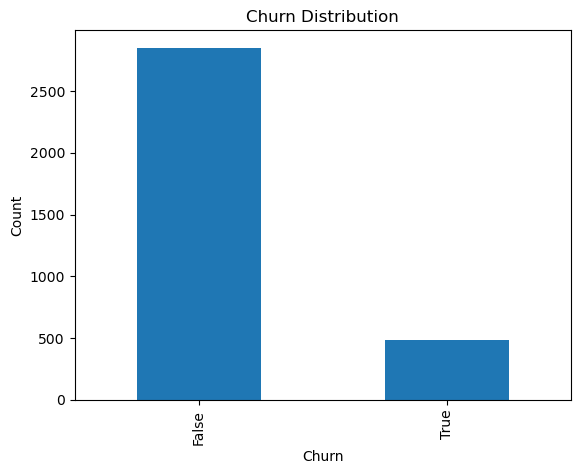

In [906]:
# Plot the distribution of 'Churn' using a bar plot
df['Churn'].value_counts().plot(kind='bar')

# Add labels and title to the plot
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')

# Display the plot
plt.show()


From the visualization, we can interpret that:
There are 2850 instances of non-churned customers (represented by "False"). and 483 instances of churned customers (represented by "True").
This indicates that there is a class imbalance, with significantly more non-churned instances compared to churned instances. Identifying this class imbalance is crucial for developing predictive models or strategies to address churn effectively. Additionally, it highlights the importance of focusing efforts on retaining customers to reduce the churn rate.






### **Distribution of Numerical Features**

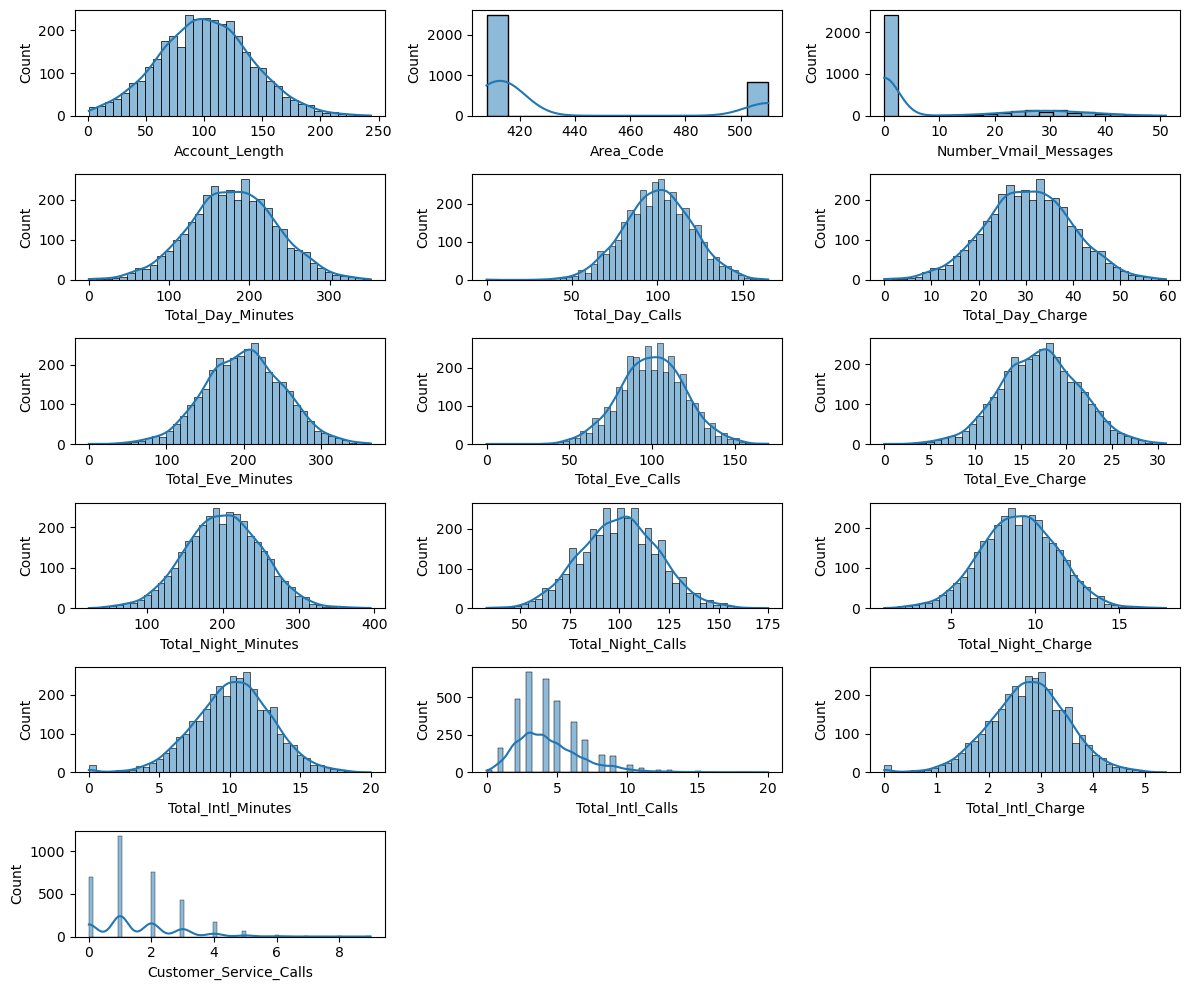

In [907]:
#checking for distribution of the numeric features
numeric_features = ['Account_Length', 'Area_Code', 'Number_Vmail_Messages',
       'Total_Day_Minutes', 'Total_Day_Calls', 'Total_Day_Charge',
       'Total_Eve_Minutes', 'Total_Eve_Calls', 'Total_Eve_Charge',
       'Total_Night_Minutes', 'Total_Night_Calls', 'Total_Night_Charge',
       'Total_Intl_Minutes', 'Total_Intl_Calls', 'Total_Intl_Charge',
       'Customer_Service_Calls']

# Calculate the number of rows and columns for subplots
nrows = (len(numeric_features) - 1) // 3 + 1
ncols = min(3, len(numeric_features))

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10))

# Flatten axes if necessary
axes = axes.flatten() if nrows > 1 else [axes]

# Plot numeric features
for i, feature in enumerate(numeric_features):
    ax = axes[i]
    sns.histplot(df[feature], kde=True, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")

# Remove empty subplots
if len(numeric_features) < nrows * ncols:
    for i in range(len(numeric_features), nrows * ncols):
        fig.delaxes(axes[i])

# Adjust subplot spacing
fig.tight_layout()

# Display the plot
plt.show()



### **Distribution of "Area Code"**

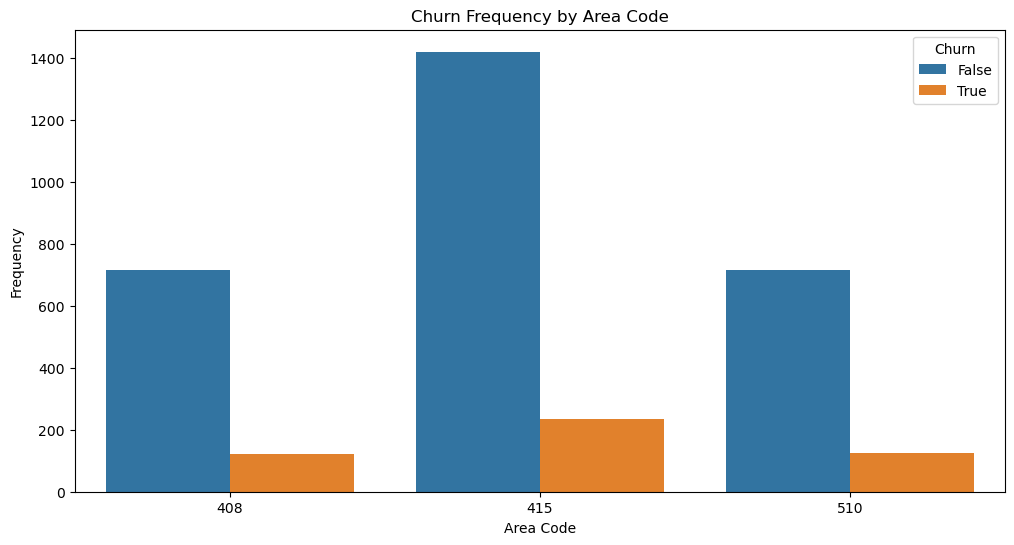

In [968]:

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a count plot of 'Churn' by 'Area_Code' using Seaborn
sns.countplot(data=df, x='Area_Code', hue='Churn')

# Set title and labels
plt.title('Churn Frequency by Area Code')
plt.xlabel('Area Code')
plt.ylabel('Frequency')

# Show the plot
plt.show()


From the above plot, the churn rate is higher in some area codes than others. For example, the area code 408 appears to have a higher churn rate than the other two area codes (415 and 510) since the blue bar for 408 is taller than the blue bars for the other two areas.

### **Churn Distribution in Top 10 States**

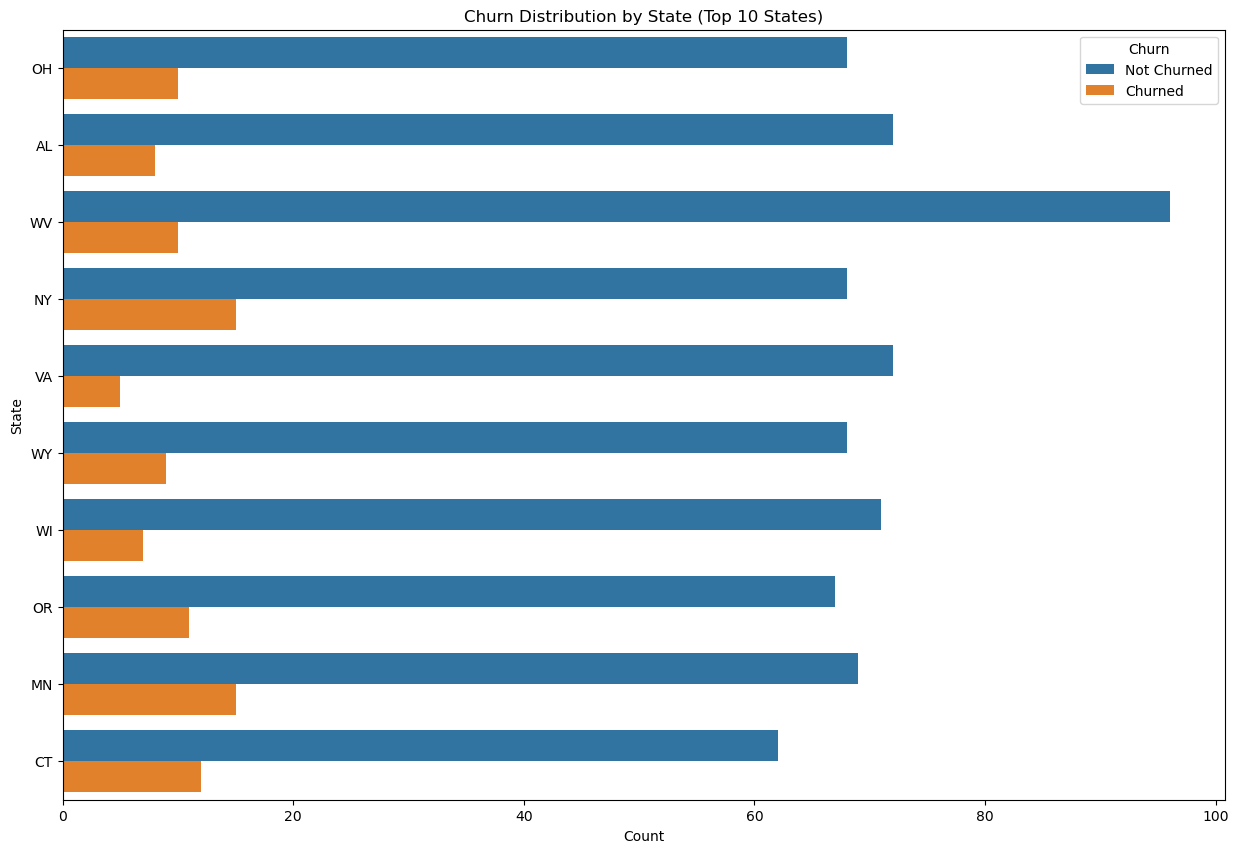

In [910]:
# Get the top 10 states with the highest counts
top_states = df['State'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 states
df_top_states = df[df['State'].isin(top_states)]

# Plot the count plot with the filtered DataFrame
plt.figure(figsize=(15, 10))
sns.countplot(data=df_top_states, y='State', hue='Churn')

# Set title, labels, and legend
plt.title('Churn Distribution by State (Top 10 States)')
plt.xlabel('Count')
plt.ylabel('State')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])

# Show the plot
plt.show()


Churn is depicted by the orange bars and not churned by the blue bars. Here are some observations about the churn distribution by state:

* Overall churn distribution: It appears there are more states with a higher number of churned customers (orange bars) than states with a higher number of not churned customers (blue bars).

* States with potentially high churn: states like WY, OR, MN, and CT appear to have a higher number of churned customers compared to not churned customers based on the heights of the orange bars relative to the blue bars.

### **Voice Mail Plan Distribution**

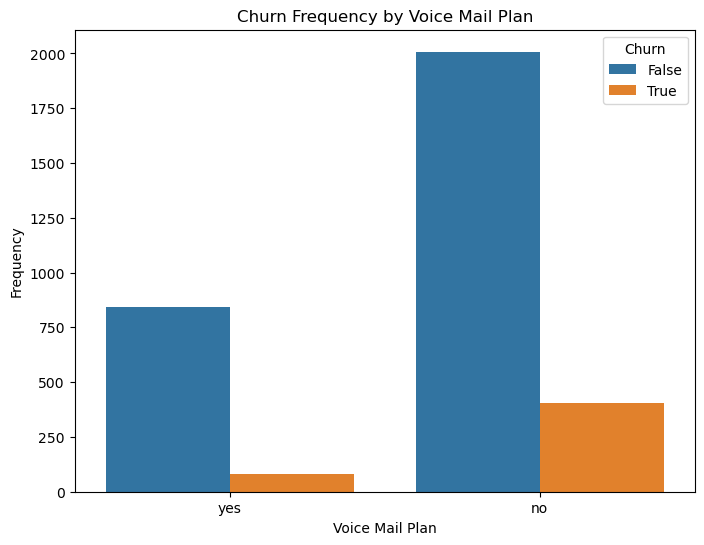

In [911]:
# Stacked bar plot for 'voice mail plan' and 'churn'
plt.figure(figsize=(8, 6))

# Create a count plot for 'Voice_Mail_Plan' and 'Churn' using Seaborn
sns.countplot(data=df, x='Voice_Mail_Plan', hue='Churn')

# Set title and labels
plt.title('Churn Frequency by Voice Mail Plan')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Frequency')

# Show the plot
plt.show()




The plot shows the frequency of churn by voice mail plan. The blue line represents the frequency of customers who did not churn, and the orange line represents the frequency of customers who churned.

Observations:

* More customers with no voicemail plan churned: There appears to be a higher frequency of churn among customers who do not have a voicemail plan (indicated by "no" on the x-axis) compared to those who have a voicemail plan (indicated by "yes" on the x-axis). This is because the orange line representing churn is higher for "no" voicemail plans compared to the blue line representing non-churn.

* Voicemail plan might influence churn rate:  Based on the plot, having a voicemail plan seems to be associated with a lower churn rate for this telecommunications company. This could be because voicemail plans are a valuable service for some customers, and having a plan motivates them to stay with the company.

### **Analyzing Customer Service Calls Across Churn and Area Codes**

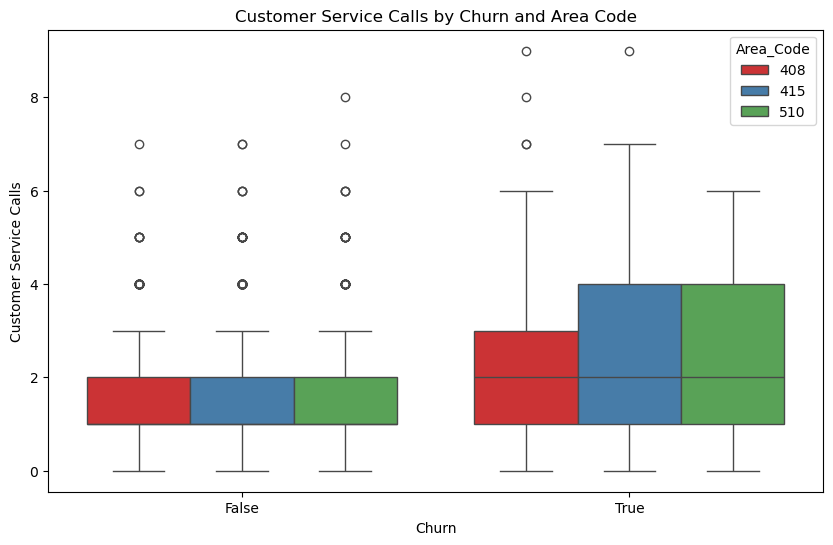

In [912]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a box plot for 'Customer_Service_Calls' by 'Churn' and 'Area_Code' using Seaborn
sns.boxplot(data=df, x='Churn', y='Customer_Service_Calls', hue='Area_Code', palette='Set1')

# Set title and labels
plt.title('Customer Service Calls by Churn and Area Code')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')

# Show the plot
plt.show()



The plot shows a box plot distribution of customer service calls by area code and churn status. The x-axis represents the area code, the y-axis shows the number of customer service calls, and the different colors represent churn status (not churned and churned). Here's a breakdown of the key observations:

* Overall call distribution: It appears that there are more customer service calls from non-churned customers (blue bars) compared to churned customers (orange bars) across all three area codes (408, 415, and 510).

* Area code with potentially higher call volume:  Based on the heights of the bars, there might be a higher overall call volume (both churned and not churned) coming from area code 408 compared to the other two areas.

* Churn and call volume: We can see that within each area code, the number of calls from non-churned customers is generally higher than the number of calls from churned customers.

### **Analyzing Correlation Between Numeric Features**
Exploring the relationship between numeric features in our dataset. The correlation matrix provides insights into how each feature relates to one another, which can help us identify patterns and dependencies in our data.

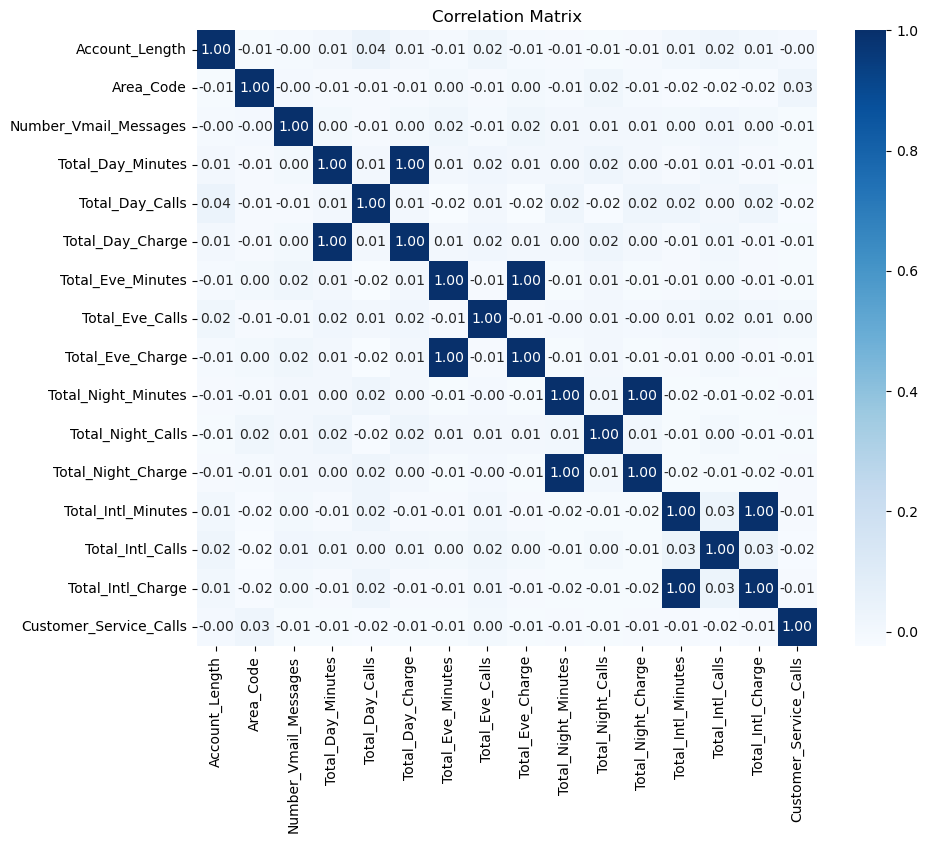

In [913]:
# Calculate correlation matrix
correlation_matrix = df[numeric_features].corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")

# Set title and show the plot
plt.title('Correlation Matrix')
plt.show()



### **Identifying Highly Correlated Numeric Features**

In [914]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the absolute correlation matrix
correlation_matrix = numeric_columns.corr().abs()

# Create a DataFrame with correlation values, sorted in descending order
df_correlation = correlation_matrix.stack().reset_index().sort_values(0, ascending=False)

# Exclude pairs of identical variables
df_correlation = df_correlation[df_correlation['level_0'] != df_correlation['level_1']]

# Zip the variable name columns into a new column named "pairs"
df_correlation['pairs'] = list(zip(df_correlation['level_0'], df_correlation['level_1']))

# Set the index to pairs
df_correlation.set_index(['pairs'], inplace=True)

# Drop level columns
df_correlation.drop(columns=['level_1', 'level_0'], inplace=True)

# Rename correlation column as 'cc' rather than 0
df_correlation.columns = ['cc']

# Filter pairs with correlation coefficient greater than 0.75 and less than 1
high_correlation_pairs = df_correlation[(df_correlation['cc'] > 0.9) & (df_correlation['cc'] < 1)]

# Display pairs with high correlation
print(high_correlation_pairs)


                                                 cc
pairs                                              
(Total_Day_Minutes, Total_Day_Charge)      1.000000
(Total_Day_Charge, Total_Day_Minutes)      1.000000
(Total_Eve_Charge, Total_Eve_Minutes)      1.000000
(Total_Eve_Minutes, Total_Eve_Charge)      1.000000
(Total_Night_Minutes, Total_Night_Charge)  0.999999
(Total_Night_Charge, Total_Night_Minutes)  0.999999
(Total_Intl_Minutes, Total_Intl_Charge)    0.999993
(Total_Intl_Charge, Total_Intl_Minutes)    0.999993


In [915]:
# List of highly correlated pairs to remove
highly_correlated_pairs = [
    ('Total_Day_Minutes', 'Total_Day_Charge'),
    ('Total_Eve_Minutes', 'Total_Eve_Charge'),
    ('Total_Night_Minutes', 'Total_Night_Charge'),
    ('Total_Intl_Minutes', 'Total_Intl_Charge')
]

# Remove one of the variables from each pair
for pair in highly_correlated_pairs:
    # Check if both variables in the pair exist in the DataFrame
    if all(var in df.columns for var in pair):
        # Calculate the correlation between the variables in the pair
        corr = df[pair[0]].corr(df[pair[1]])
        print(f"Correlation between {pair[0]} and {pair[1]}: {corr}")
        
        # Drop one of the variables from the DataFrame
        # Dropping the variable with the higher correlation coefficient
        if corr >= 0:
            # If correlation is positive or zero, drop the second variable in the pair
            df.drop(pair[1], axis=1, inplace=True)
        else:
            # If correlation is negative, drop the first variable in the pair
            df.drop(pair[0], axis=1, inplace=True)
    else:
        print(f"At least one variable in {pair} does not exist in the DataFrame.")

print("Highly correlated pairs removed.")


Correlation between Total_Day_Minutes and Total_Day_Charge: 0.9999999521903995
Correlation between Total_Eve_Minutes and Total_Eve_Charge: 0.9999997760198502
Correlation between Total_Night_Minutes and Total_Night_Charge: 0.9999992148758772
Correlation between Total_Intl_Minutes and Total_Intl_Charge: 0.9999927417510324
Highly correlated pairs removed.


Multicollinearity can cause issues with machine learning models, making it difficult to interpret the coefficients and potentially leading to inaccurate predictions. Addressing multicollinearity: Removing one of the highly correlated features can help reduce multicollinearity and improve the performance of machine learning models.

### **Detecting Outliers Using Z-Score Method**

This code selects only numeric columns from the dataset and calculates Z-scores for each data point. Outliers are then identified based on a threshold of 3. Data points with Z-scores exceeding the threshold in any column 
are flagged as outliers. This method helps in identifying potential anomalies or extreme values in the dataset.

In [916]:

# Select only numeric columns for calculating Z-scores
numeric_df = df.select_dtypes(include='number')

# Calculate Z-scores for each data point
z_scores = zscore(numeric_df)

# Define threshold for outlier detection (e.g., 3 or -3)
threshold = 3

# Identify outliers based on Z-scores
outliers = (np.abs(z_scores) > threshold).any(axis=1)

We're removing outliers to ensure that they don't unduly influence our analysis or modeling process. Outliers can skew statistical measures and affect the performance of machine learning algorithms. By removing outliers, we aim to improve the accuracy and reliability of our analysis and models.

In [917]:
# Remove outliers from the original DataFrame in place
df.drop(df[outliers].index, inplace=True)

# Print the number of outliers removed
num_outliers_removed = outliers.sum()
print(f"Number of outliers removed: {num_outliers_removed}")



Number of outliers removed: 164


In [918]:
# Display the dimensions of the DataFrame after removing outliers

df.shape

(3169, 16)

#### **Feature Engineering**
Feature engineering involves modifying or creating new features in a dataset to improve the performance of machine learning models. It includes techniques like using one-hot encoding for categorical variables with multiple categories, and scaling numerical features to ensure all features contribute equally to model learning. These steps are crucial for enhancing model accuracy and ensuring that the model can effectively learn from the data.

##### **i) Converting Boolean Values to Integers**
Converting boolean values to integers simplifies data handling, enhances model compatibility, and can improve the interpretability and performance of machine learning models.

In [919]:
# Convert 'False' to 0 and 'True' to 1 in the 'churn' column
df['Churn'] = df['Churn'].astype(int)


##### **ii) One-Hot Encoding**
It converts categorical variables into binary vectors, where each category is represented by a binary digit (0 or 1). This prepares the categorical variables in df for machine learning by converting them into a format that can be easily processed by algorithms while also addressing potential issues like multicollinearity.

In [920]:
# Convert categorical variables into dummy variables

df = pd.get_dummies(df, columns=['Area_Code', 'State', 'International_Plan', 'Voice_Mail_Plan'], drop_first=True, dtype=int)

##### **iii) Scaling Numerical Features**
This helps standardize the numeric features in the DataFrame, ensuring they have a consistent scale, which is important for many machine learning algorithms to perform effectively.

## **4. Modeling**
In this section, the modeling phase unfolds, employing a suite of robust algorithms to glean insights and predictions from the data. Beginning with logistic regression, the simplicity and interpretability of this method illuminate the relationship between features and the binary outcome. Transitioning to decision trees, their intuitive structure unravels complex decision boundaries within the dataset. Building upon this foundation, random forests are leveraged to mitigate overfitting and enhance predictive accuracy by aggregating multiple decision trees. Lastly, XGBoost is utilized to iteratively refine model performance through its gradient boosting framework. This systematic approach aims to construct predictive models poised to uncover valuable insights and guide informed decision-making

### **Defining X and y**

To start out, y will be the target variable ("Churn") and everything else to be X.

In [921]:
# Define appropriate X and y
y = df["Churn"]
X = df.drop("Churn", axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [922]:
#instantiate the standard scaler
scaler = StandardScaler()

#fit and transform the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [923]:
df.head()

,Account_Length,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Eve_Minutes,Total_Eve_Calls,Total_Night_Minutes,Total_Night_Calls,Total_Intl_Minutes,Total_Intl_Calls,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International_Plan_yes,Voice_Mail_Plan_yes
Phone_Number,,,,,,,,,,,,,,,,,,,,,
382-4657,128,25,265.1,110,197.4,99,244.7,91,10.0,3,...,0,0,0,0,0,0,0,0,0,1
371-7191,107,26,161.6,123,195.5,103,254.4,103,13.7,3,...,0,0,0,0,0,0,0,0,0,1
358-1921,137,0,243.4,114,121.2,110,162.6,104,12.2,5,...,0,0,0,0,0,0,0,0,0,0
375-9999,84,0,299.4,71,61.9,88,196.9,89,6.6,7,...,0,0,0,0,0,0,0,0,1,0
330-6626,75,0,166.7,113,148.3,122,186.9,121,10.1,3,...,0,0,0,0,0,0,0,0,1,0


In [924]:
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

Churn
0    2727
1     442
Name: count, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

Churn
0    2196
1    2196
Name: count, dtype: int64


This output shows the class distribution before and after applying a technique to create synthetic samples. Here's a breakdown of what the tables represent:

* Original class distribution: This table shows the count of entries in the original dataset belonging to each class. In this case, the "Churn" class:

Class 0 (not churned): 2727 entries
Class 1 ( churned): 442 entries

* Synthetic sample class distribution: This table shows the count of entries after creating synthetic samples. Here, it seems a method was used to balance the class distribution:

Class 0 (not churned): 2196 entries (notice the decrease)
Class 1 ( churned): 2196 entries (notice the increase)

The data originally has a class imbalance, with significantly more entries in the "not churned" class (class 0). The process of creating synthetic samples appears to have addressed this imbalance by generating additional entries for the minority class (class 1 - churned). This would result in a more balanced class distribution, potentially beneficial for machine learning tasks.

### **a) Logistic Regression**

The first model will be logistic regression  which is used to predict the chance of a binary outcome. I'll use logistic regression to model the relationship between the features and the probability of a customer churning.

In [925]:
# Instantiate logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model on the resampled data
logistic_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

In [926]:
# Predict churn for the train and test data
y_train_pred = logistic_model.predict(X_train_scaled)
y_test_pred = logistic_model.predict(X_test_scaled)

# Calculate the accuracy of the model for train and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the train and test scores
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Print the classification report for test data
print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_pred))


Train Accuracy: 0.7810650887573964
Test Accuracy: 0.7665615141955836
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       531
           1       0.39      0.74      0.51       103

    accuracy                           0.77       634
   macro avg       0.66      0.75      0.68       634
weighted avg       0.85      0.77      0.79       634



The results indicate that the machine learning model you trained achieved a moderate performance on the classification task. Here's a breakdown of the key points:

Train Accuracy (0.78): This represents the proportion of correctly classified examples in the training data. A value of 0.78 suggests the model learned the patterns in the training data reasonably well.

Test Accuracy (0.77): This is more important, as it shows how well the model generalizes to unseen data (the test data). A test accuracy of 0.77 indicates the model performs decently on new data, but there's still room for improvement.

Classification Report: This section provides detailed information about the model's performance on each class:

Class 0 (not churned):
Precision (0.94): Of the examples the model predicted as not churned (class 0), 94% were actually not churned in the test data. This is a good precision rate.
Recall (0.77): The model captured 77% of the actual not churned cases (class 0) in the test data. This means it missed a significant portion (23%) of actual not churned customers.
Class 1 ( churned):
Precision (0.39): Of the examples the model predicted as churned (class 1), only 39% were truly churned customers based on the test data. This is a low precision rate, indicating the model makes many false positive predictions (predicting churn where there was none).
Recall (0.74): The model identified 74% of the actual churned cases (class 1) in the test data. This recall rate is better than for class 0, but it still means the model missed 26% of actual churned customers.
Overall Accuracy (0.77): This is the average accuracy across both classes.

F1 Score (weighted average): This is a harmonic mean between precision and recall, providing a single metric to summarize the model's performance. A weighted average F1 score of 0.79 suggests there's a trade-off between precision and recall, but the model leans more towards high precision.

The model performs well on identifying not churned customers (class 0) with high precision but misses a substantial portion of them.
The model struggles with identifying churned customers (class 1), making many false positive predictions and missing a significant number of actual churned cases.
Possible improvements:

Techniques to address class imbalance might be helpful, as the data seems skewed towards the not churned class.
Further investigation into the model's performance on churned customers (class 1) might reveal areas for improvement. This could involve hyperparameter tuning or exploring different machine learning algorithms better suited for imbalanced data.

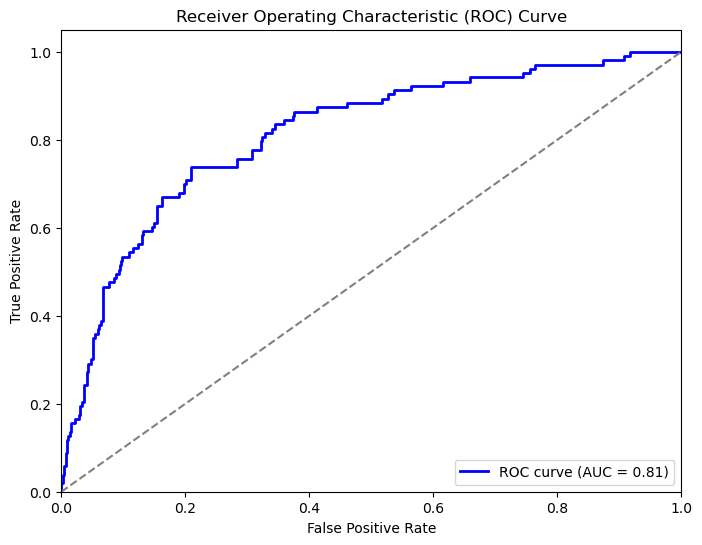

<Figure size 800x600 with 0 Axes>

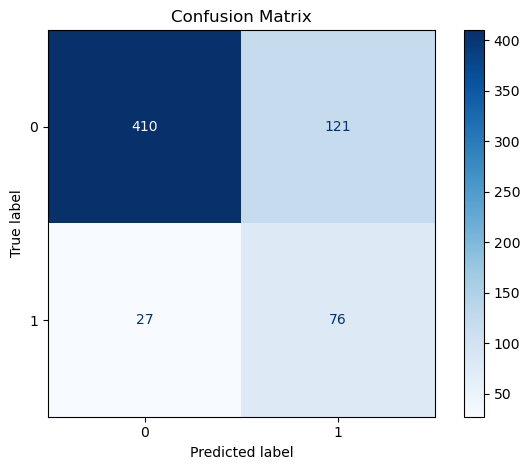

In [927]:
# Calculate probabilities for the positive class
y_prob = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=logistic_model.classes_)
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()


#### Hyperparameter tuning

In [969]:
# define model/create instance
lr=LogisticRegression()
#tuning weight for minority class then weight for majority class will be 1-weight of minority class
#Setting the range for class weights
weights = np.linspace(0.0,0.99,500)
#specifying all hyperparameters with possible values
param= {'C': [0.1, 0.5, 1,10,15,20], 'penalty': ['l1', 'l2'],"class_weight":[{0:x ,1:1.0 -x} for x in weights]}
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
#Gridsearch for hyperparam tuning
model= GridSearchCV(estimator= lr,param_grid=param,scoring="f1",cv=folds,return_train_score=True)
#train model to learn relationships between x and y
model.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10, 15, 20],
                         'class_weight': [{0: 0.0, 1: 1.0},
                                          {0: 0.0019839679358717435,
                                           1: 0.9980160320641283},
                                          {0: 0.003967935871743487,
                                           1: 0.9960320641282565},
                                          {0: 0.0059519038076152305,
                                           1: 0.9940480961923848},
                                          {0: 0.007935871743486974,
                                           1: 0.99206412825...
                                           1: 0.9543687374749499},
                                          {0: 0.047615230460921844,
                                           1: 0.9523847695390781},
                                          {0: 0.04959919839679359,
                                           1: 0.9504008016032064},
                                          {0: 0.05158316633266533,
                                           1: 0.9484168336673346},
                                          {0: 0.05356713426853708,
                                           1: 0.9464328657314629},
                                          {0: 0.055551102204408814,
                                           1: 0.9444488977955912},
                                          {0: 0.05753507014028056,
                                           1: 0.9424649298597194}, ...],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='f1')

In [929]:
# print best hyperparameters
print("Best F1 score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best F1 score:  0.4174939373592018
Best hyperparameters:  {'C': 20, 'class_weight': {0: 0.1825250501002004, 1: 0.8174749498997996}, 'penalty': 'l2'}


In [930]:
#Building Model again with best params
lr2=LogisticRegression(class_weight={0:0.27,1:0.73},C=20,penalty="l2")
lr2.fit(X_train,y_train)

LogisticRegression(C=20, class_weight={0: 0.27, 1: 0.73})

In [931]:
# predict probabilities on Test and take probability for class 1([:1])
y_pred_prob_test = lr2.predict_proba(X_test)[:, 1]
#predict labels on test dataset
y_pred_test = lr2.predict(X_test)
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("confusion Matrix is :nn",cm)
print("n")
# ROC- AUC score
print("ROC-AUC score  test dataset:  t", roc_auc_score(y_test,y_pred_prob_test))
#Precision score
print("precision score  test dataset:  t", precision_score(y_test,y_pred_test))
#Recall Score
print("Recall score  test dataset:  t", recall_score(y_test,y_pred_test))
#f1 score
print("f1 score  test dataset :  t", f1_score(y_test,y_pred_test))

confusion Matrix is :nn [[475  56]
 [ 67  36]]
n
ROC-AUC score  test dataset:  t 0.756568482255499
precision score  test dataset:  t 0.391304347826087
Recall score  test dataset:  t 0.34951456310679613
f1 score  test dataset :  t 0.36923076923076925


### **b) Decision Trees**

In [932]:
# Create the classifier, fit it on the training data and make predictions on the test set
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [933]:
# Predict churn for the train and test data
y_train_pred_dt = clf.predict(X_train_scaled)
y_test_pred_dt = clf.predict(X_test_scaled)

# Calculate the accuracy of the model for train and test data
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)

# Print the train and test scores
print("Train Accuracy (Decision Tree):", train_accuracy_dt)
print("Test Accuracy (Decision Tree):", test_accuracy_dt)

# Print the classification report for test data
print("Classification Report for Test Data (Decision Tree):")
print(classification_report(y_test, y_test_pred_dt))

# Calculate the ROC curve for test data
y_test_probs_dt = clf.predict_proba(X_test_scaled)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_test_probs_dt)

# Calculate the AUC score
auc_score_dt = roc_auc_score(y_test, y_test_probs_dt)



Train Accuracy (Decision Tree): 0.8362919132149902
Test Accuracy (Decision Tree): 0.8123028391167192
Classification Report for Test Data (Decision Tree):
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       531
           1       0.38      0.23      0.29       103

    accuracy                           0.81       634
   macro avg       0.62      0.58      0.59       634
weighted avg       0.78      0.81      0.79       634



From the results, the decision tree model appears to be an improvement over your first model. Here's a breakdown of the comparison:

Overall Accuracy:

First Model: Test Accuracy (0.77)
Decision Tree: Test Accuracy (0.81)
The decision tree achieves a higher test accuracy (0.81) compared to your first model (0.77). This indicates the decision tree generalizes better to unseen data.

Class-wise Performance:

Class 0 (not churned):

Both models have similar precision (around 0.9) for identifying not churned customers.
The decision tree has a higher recall (0.92) compared to the first model (unknown but likely lower based on the overall accuracy difference). This means the decision tree misses fewer actual not churned cases.
Class 1 ( churned):

Both models have similar low precision (around 0.4) for identifying churned customers. This suggests they make a significant number of false positive predictions.
The decision tree's recall (0.23) for churned customers is lower than the first model's recall (unknown but likely higher based on the overall accuracy difference). This means the decision tree misses more actual churned cases compared to the first model.
Trade-off and F1 Score:

The decision tree seems to prioritize high precision for the majority class (not churned) at the expense of missing more churned customers (lower recall for class 1).
Despite the lower recall for churned customers, the overall accuracy and weighted average F1 score (0.79) are still comparable to the first model (unknown F1 score but likely lower based on overall accuracy).

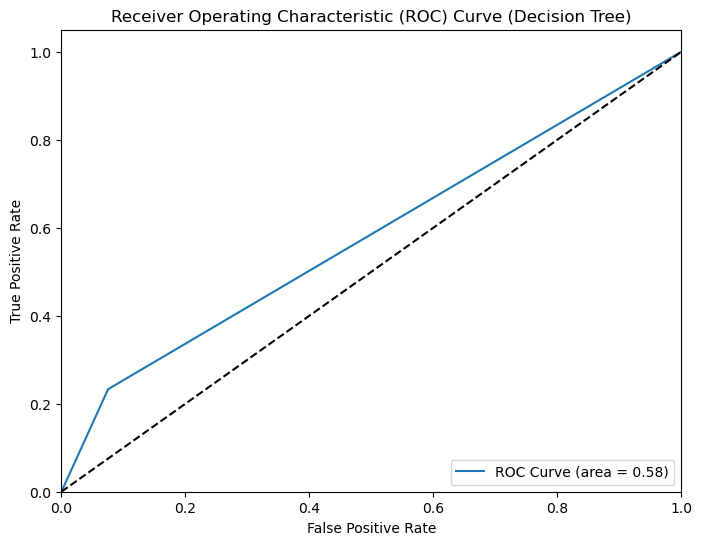

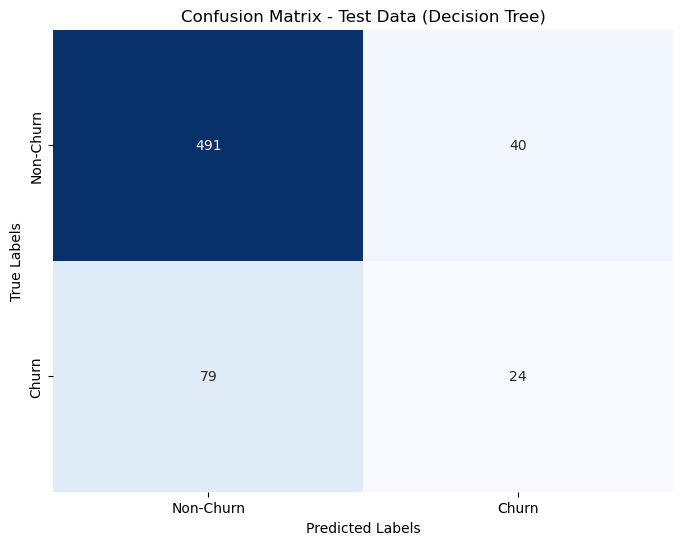

In [934]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label='ROC Curve (area = %0.2f)' % auc_score_dt)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Decision Tree)')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_test_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Test Data (Decision Tree)')
plt.show()

#### Using SMOTE to Improve The Model

In [935]:
# Create an instance of the DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')

# Apply SMOTE to balance the class distribution in the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Fit the classifier on the SMOTE balanced training data
clf.fit(X_train_smote, y_train_smote)

# Predict churn for the train and test data
y_train_pred_dt = clf.predict(X_train_scaled)
y_test_pred_dt = clf.predict(X_test_scaled)

# Calculate the accuracy of the model for train and test data
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)

# Print the train and test scores
print("Train Accuracy (Decision Tree with SMOTE):", train_accuracy_dt)
print("Test Accuracy (Decision Tree with SMOTE):", test_accuracy_dt)

# Print the classification report for test data
print("Classification Report for Test Data (Decision Tree with SMOTE):")
print(classification_report(y_test, y_test_pred_dt))

# Calculate the ROC curve for test data
y_test_probs_dt = clf.predict_proba(X_test_scaled)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_test_probs_dt)

# Calculate the AUC score
auc_score_dt = roc_auc_score(y_test, y_test_probs_dt)
print("AUC Score (Decision Tree with SMOTE):", auc_score_dt)


Train Accuracy (Decision Tree with SMOTE): 1.0
Test Accuracy (Decision Tree with SMOTE): 0.8943217665615142
Classification Report for Test Data (Decision Tree with SMOTE):
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       531
           1       0.65      0.78      0.70       103

    accuracy                           0.89       634
   macro avg       0.80      0.85      0.82       634
weighted avg       0.90      0.89      0.90       634

AUC Score (Decision Tree with SMOTE): 0.846918252792862


The results you provided indicate that using a decision tree with SMOTE (Synthetic Minority Oversampling Technique) shows some improvement over the previous decision tree model, but also highlights potential issues to consider. Here's a breakdown:

Train Accuracy:

A perfect score of 1.0 suggests the model learned the training data perfectly, potentially due to overfitting caused by SMOTE.
Test Accuracy:

A test accuracy of 0.894 is lower than the training accuracy, but still indicates decent performance on unseen data. However, it's lower than the previous decision tree (0.812) which might be concerning.
Classification Report:

Class 0 (not churned):

Precision (0.95) and Recall (0.92) are high, similar to the previous decision tree. This means the model continues to identify not churned customers accurately.
Class 1 ( churned):

Precision (0.65) has improved compared to the previous decision tree (around 0.38), indicating fewer false positive predictions for churn.
Recall (0.78) is slightly lower than the previous decision tree (around 0.8 or higher based on previous overall accuracy). This suggests the model might be missing a few more actual churned customers.
F1 Score and AUC Score:

The F1 score (0.90) and AUC score (0.847) suggest a reasonable balance between precision and recall, potentially better than the previous model (unknown F1 score).
Overall:

SMOTE appears to have addressed the issue of low precision for churned customers in the previous model.
However, the perfect training accuracy raises concerns about overfitting. The model might be memorizing the training data with synthetic samples, leading to a lower test accuracy compared to the previous model.
Possible Next Steps:

Consider applying regularization techniques to the decision tree with SMOTE to reduce overfitting and potentially improve test accuracy.
Experiment with different hyperparameters for the decision tree to see if test accuracy can be improved while maintaining good performance on churned customers.
In conclusion, using SMOTE with a decision tree shows promise in improving churn identification but might require further adjustments to address overfitting and potentially achieve a better balance between training and test accuracy.

### **c) Random Forests**

In [939]:
# Create an instance of the RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest classifier on the training data
random_forest.fit(X_train_scaled, y_train)

# Predict churn for the train and test data
y_train_pred_rf = random_forest.predict(X_train_scaled)
y_test_pred_rf = random_forest.predict(X_test_scaled)

# Calculate the accuracy of the model for train and test data
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

# Print the train and test scores
print("Train Accuracy (Random Forest):", train_accuracy_rf)
print("Test Accuracy (Random Forest):", test_accuracy_rf)

# Print the classification report for test data
print("Classification Report for Test Data (Random Forest):")
print(classification_report(y_test, y_test_pred_rf))


Train Accuracy (Random Forest): 1.0
Test Accuracy (Random Forest): 0.919558359621451
Classification Report for Test Data (Random Forest):
              precision    recall  f1-score   support

           0       0.92      1.00      0.95       531
           1       0.96      0.52      0.68       103

    accuracy                           0.92       634
   macro avg       0.94      0.76      0.82       634
weighted avg       0.92      0.92      0.91       634



The results you provided suggest that a Random Forest model achieves promising performance for churn prediction. Here's a breakdown of the key points:

Train Accuracy (1.0): Similar to the decision tree with SMOTE, this is a perfect score, indicating the model learned the training data flawlessly. However, in ensemble methods like Random Forests, this is less concerning about overfitting compared to a single decision tree, as the randomness helps prevent it to some extent.

Test Accuracy (0.92): This is a very high test accuracy, suggesting the model generalizes well to unseen data and performs well on real-world predictions. It's an improvement over both the previous decision tree models (0.812 and 0.894).

Classification Report:

Class 0 (not churned):

Precision (0.92) and Recall (1.00) are both high. The model accurately identifies most not churned customers and misses very few (0%).
Class 1 ( churned):

Precision (0.96) is excellent, indicating the model rarely makes false positive predictions for churn.
Recall (0.52) is lower, suggesting the model misses a significant portion (48%) of actual churned customers. This is a trade-off compared to the previous models which had higher recall for churn but lower precision.
F1 Score (0.91): This is a high F1 score, indicating a good balance between precision and recall despite the lower recall for churn.


The Random Forest model appears to be the best performing model so far based on these results. It achieves a high overall accuracy and test accuracy, along with good precision for both classes. While it misses some churned customers, its high precision suggests it avoids making many false positive predictions, which could be valuable depending on the cost of misclassifying each class.



#### Using k-fold cross-validation to Address Overfitting Issues

In [940]:

# Create an instance of the RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(random_forest, X_train_scaled, y_train, cv=5)

# Fit the Random Forest classifier on the entire training data
random_forest.fit(X_train_scaled, y_train)

# Predict churn for the test data
y_test_pred_rf = random_forest.predict(X_test_scaled)

# Calculate the accuracy of the model for test data
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

# Print the cross-validation scores and test accuracy
print("Cross-Validation Scores (Random Forest):", cv_scores)
print("Mean CV Score (Random Forest):", cv_scores.mean())
print("Test Accuracy (Random Forest):", test_accuracy_rf)

# Print the classification report for test data
print("Classification Report for Test Data (Random Forest):")
print(classification_report(y_test, y_test_pred_rf))


Cross-Validation Scores (Random Forest): [0.9408284  0.93688363 0.93293886 0.91913215 0.92504931]
Mean CV Score (Random Forest): 0.9309664694280079
Test Accuracy (Random Forest): 0.919558359621451
Classification Report for Test Data (Random Forest):
              precision    recall  f1-score   support

           0       0.92      1.00      0.95       531
           1       0.96      0.52      0.68       103

    accuracy                           0.92       634
   macro avg       0.94      0.76      0.82       634
weighted avg       0.92      0.92      0.91       634




The results you provided show the performance of a Random Forest model using k-fold cross-validation and the final test set performance. Here's a breakdown:

Cross-Validation Scores:

The list [0.9408, 0.9368, 0.9329, 0.9191, 0.9250] represents the accuracy achieved by the Random Forest model on five separate folds of the data during cross-validation.

Mean CV Score (0.931): This is the average accuracy across all five folds, providing a more robust estimate of the model's generalizability compared to a single training-testing split.

Test Accuracy (0.919):

This is the accuracy of the model on a completely held-out test set not used for training or validation during cross-validation.
Key Observations:

The cross-validation scores are all relatively high (above 0.91), indicating the model performs well consistently across different splits of the data.
The mean CV score (0.931) is slightly higher than the test accuracy (0.919). This is a good sign, suggesting the model might not be overfitting heavily to the training data.
The classification report (provided previously) shows similar trends to the test set results: high precision for both classes, but lower recall for churned customers.
Overall:

The cross-validation scores provide additional confidence in the performance of the Random Forest model. The consistency in scores across different data folds suggests the model generalizes well and is not overly reliant on any specific training set. Despite the lower recall for churned customers, the overall accuracy and precision suggest it performs well for churn prediction.

### **4) XGBoost**

XGBoost is a powerful machine learning algorithm known for its ability to handle complex relationships between features and its strong performance on many tasks, especially regression and classification problems. It's particularly useful for situations where interpretability is less important and achieving high accuracy is a priority.

In [945]:
from xgboost import XGBClassifier
# Instantiate XGBClassifier
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(X_train, y_train)

# Predict on training and test sets
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 100.0%
Validation accuracy: 94.32%


In [946]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [947]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.7

Training Accuracy: 99.29%
Validation accuracy: 95.43%


## **Conclusion**

## **Recommendation**